In [1]:
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import itertools
import cvxpy as cp
import pickle
from manygrid import *

from compute_solns import *

In [2]:
# Set up game

risk_levels = np.linspace(0,2,5)
proj_risk_l = lambda r: proj_risk(r,risk_levels)
rows, cols = 5, 5
grid = ManyGrid(rows=rows, cols=cols, proj_risk=proj_risk_l, risk_levels=risk_levels)
print(grid.grid[(3,3)])
grid.addPlayer("H",1,2)
grid.addPlayer("R",1,1)
print(grid.grid[(3,3)])
for i in [0,rows-1]:    
    for j in range(cols):
        grid.addWall(i,j)
for i in range(rows):    
    for j in [0,cols-1]:
        grid.addWall(i,j)

grid.addSquare(str(0.1),3,1,0.1)
grid.addSquare(str(0.2),1,3,0.2)

state_names, states = grid.get_all_states()

human_actions = grid.actions
robot_actions = grid.actions

gamma = 1
T = 10

transition = grid.transition
reward = grid.reward
print(grid.grid[(3,3)])

[]
[]
[]


In [3]:
game = get_game(grid,gamma,T)
# compute_ex_post(game)

In [4]:
name = "simple_grid_exp"
run_exp(grid,game,parallel=False,T=T, name=name)

# v_funs, uHs, uRs_coop, uRs_adv = compute_baseline(game)

# print(v_funs[0][(1,2,1,1)])


Checking if solutions exist...
Loading solutions...
Done!


In [5]:
# with open("experiments/"+name+'.pickle', 'rb') as handle:
#     solns = pickle.load(handle)
# print(solns.keys())
# print(solns["maximax_val"][0][(1,2,1,1)])

# # grid.grid[(3,3)]

In [6]:
state_names, states = grid.get_all_states()
print(len(states))

405


((1, 2, 1, 1), 0.0)


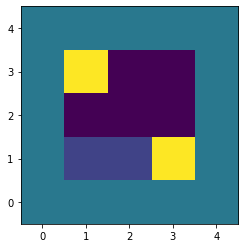

In [7]:
initial_state = grid.get_state()
print(initial_state)
grid.render()

In [8]:
# print(initial_state)
# grid.run_traj(initial_state, [(None,"U"),(None,"S"),("R","D"),("R",None),("S",None),("L",None),("L",None),("U",None),("U",None),("U",None),(None,None),(None,None)])

In [9]:
# 8mins, 78 mins, 35 mins, 70 mins
grid.set_state(initial_state)
grid.set_epsilon(1.0)
state = grid.get_state()
print(state)

((1, 2, 1, 1), 1.0)


In [10]:
res = manygrid.run_sim_single(state, grid, 1, T=T, name=name)

Computing statistics against different agents
('gift', 'coop')
((1, 2, 1, 1), 1.0)
-0.13999999983011824
-0.11999999986012577
-0.0999999998699308
-0.07999999992387608
-0.05999999995253491
-0.039999999955468324
-0.01999999995840185
('gift', 'adv')
((1, 2, 1, 1), 1.0)
-0.13999999983011824
-0.11999999986012577
-0.0999999998699308
-0.07999999992387608
-0.05999999995253491
-0.039999999955468324
-0.01999999995840185
('gift', 'random')
((1, 2, 1, 1), 1.0)
-0.13999999786538497
-0.11999999984354859
-0.09999999969892626
-0.07999999986675788
-0.05999999969127734
-0.03999999979965463
-0.01999999995840185
('maximax', 'coop')
(1, 2, 1, 1)
state= (1, 3, 2, 1) , uH= R , strat= [[0. 0. 0. 1. 0. 0.]] , uR= U total_r= 0
state= (1, 3, 3, 1) , uH= D , strat= [[0. 1. 0. 0. 0. 0.]] , uR= U total_r= 0.2
state= (1, 3, 3, 1) , uH= D , strat= [[0. 1. 0. 0. 0. 0.]] , uR= U total_r= 0.4
state= (1, 3, 3, 1) , uH= D , strat= [[0. 1. 0. 0. 0. 0.]] , uR= U total_r= 0.6000000000000001
state= (1, 3, 3, 1) , uH= D , strat

<ErrorbarContainer object of 3 artists>

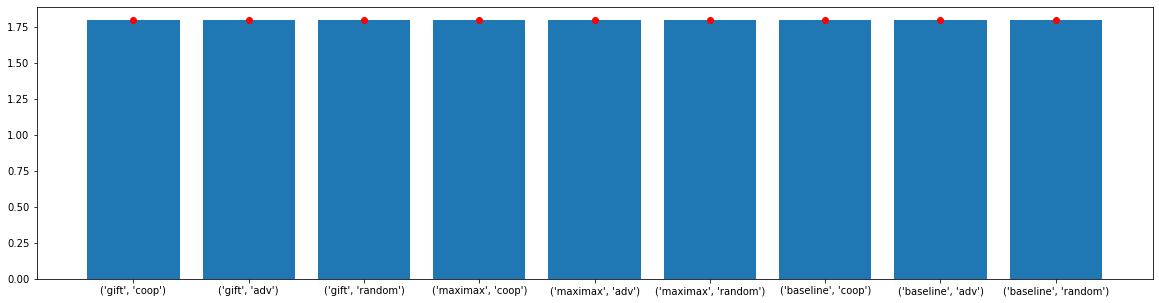

In [11]:

ress = list(zip(*res.items()))
x,z = ress[0],ress[1]
x = [str(i) for i in x]
y = [i[0] for i in z]
c  = [i[1] for i in z]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.errorbar(x, y, yerr=c, fmt="o", color="r")

In [13]:
res

{('gift', 'coop'): (1.7999999999999998, 0.0),
 ('gift', 'adv'): (1.7999999999999998, 0.0),
 ('gift', 'random'): (1.7999999999999998, 0.0),
 ('maximax', 'coop'): (1.7999999999999998, 0.0),
 ('maximax', 'adv'): (1.7999999999999998, 0.0),
 ('maximax', 'random'): (1.7999999999999998, 0.0),
 ('baseline', 'coop'): (1.7999999999999998, 0.0),
 ('baseline', 'adv'): (1.7999999999999998, 0.0),
 ('baseline', 'random'): (1.7999999999999998, 0.0)}